# Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [3]:
#reading the raw data file from local
acc_sev=pd.read_csv('E:\BIA Data Analytics and AI\Capstone Project\Road_Raw_Data.csv') 

In [4]:
#shows the first 10 values from top of table to display all columns
pd.set_option('display.max_columns', None)  
acc_sev.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y Shape,NaN,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,No defect,Residential areas,Undivided Two way,Tangent road with flat terrain,Crossing,NaN,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,No defect,Residential areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Earth roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,No defect,Residential areas,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [5]:
#the entire information of the dataset
acc_sev.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
#to check for the duplicates in the dataset
acc_sev.duplicated().sum()

0

In [7]:
#gives the described information of data(numerical values)
acc_sev.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
#the count of missing values in each cloumns
null_columns = acc_sev.isnull().sum() 
null_columns

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [9]:
#filtering null values columns from entire dataset and checking it's count
filtered_null_columns=null_columns[null_columns > 0] 
print(filtered_null_columns)
print(filtered_null_columns.count())

Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64
16


In [10]:
#filtering non-null values columns from entire dataset and checking it's count
non_null_columns=null_columns[null_columns == 0] 
print(non_null_columns)
print(non_null_columns.count())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Number_of_vehicles_involved    0
Number_of_casualties           0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64
16


In [11]:
#taking unique value counts for non-null columns
columns_with_no_nulls = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Road_surface_conditions', 
                         'Light_conditions', 'Weather_conditions', 'Number_of_vehicles_involved', 'Number_of_casualties', 
                         'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 
                         'Cause_of_accident', 'Accident_severity']
unique_value_counts = {col: acc_sev[col].value_counts() for col in columns_with_no_nulls}
for col, counts in unique_value_counts.items():
    print(f"Unique value counts for column '{col}':")
    print(counts)
    print("\n")

Unique value counts for column 'Time':
Time
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: count, Length: 1074, dtype: int64


Unique value counts for column 'Day_of_week':
Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64


Unique value counts for column 'Age_band_of_driver':
Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64


Unique value counts for column 'Sex_of_driver':
Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64


Unique value counts for column 'Road_surface_conditions':
Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Na

In [12]:
#taking unique value counts for null columns
columns_with_nulls = ['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 
                      'Owner_of_vehicle', 'Service_year_of_vehicle','Defect_of_vehicle', 'Area_accident_occured', 
                      'Lanes_or_Medians', 'Road_allignment','Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 
                      'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']
unique_value_counts = {col: acc_sev[col].value_counts() for col in columns_with_nulls}

# Step 3: Display the unique value counts for each column with null values
for col, counts in unique_value_counts.items():
    print(f"Unique value counts for column '{col}':")
    print(counts)

Unique value counts for column 'Educational_level':
Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64
Unique value counts for column 'Vehicle_driver_relation':
Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64
Unique value counts for column 'Driving_experience':
Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64
Unique value counts for column 'Type_of_vehicle':
Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 

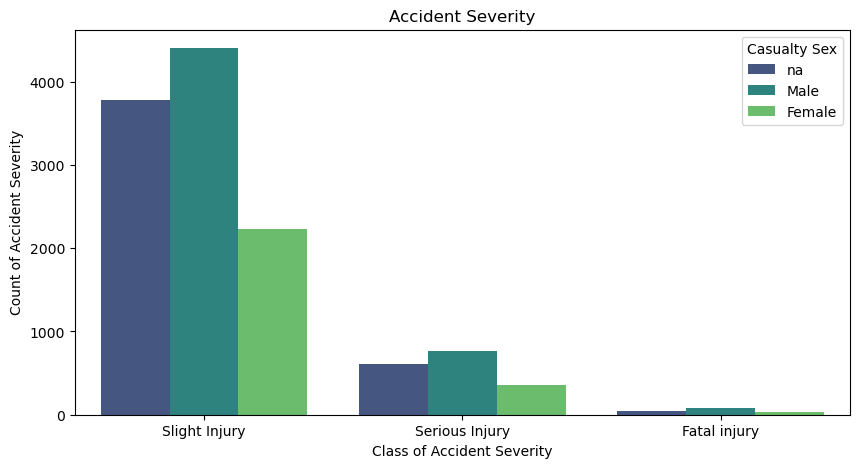

In [13]:
#creating exploratory analysis for showing a feature that relates the target
plt.figure(figsize=(10,5))
sns.countplot(x=acc_sev['Accident_severity'],hue='Sex_of_casualty',data=acc_sev,palette='viridis')
plt.xlabel('Class of Accident Severity')
plt.ylabel('Count of Accident Severity')
plt.title('Accident Severity')
plt.legend(title='Casualty Sex')

<Figure size 1000x500 with 0 Axes>

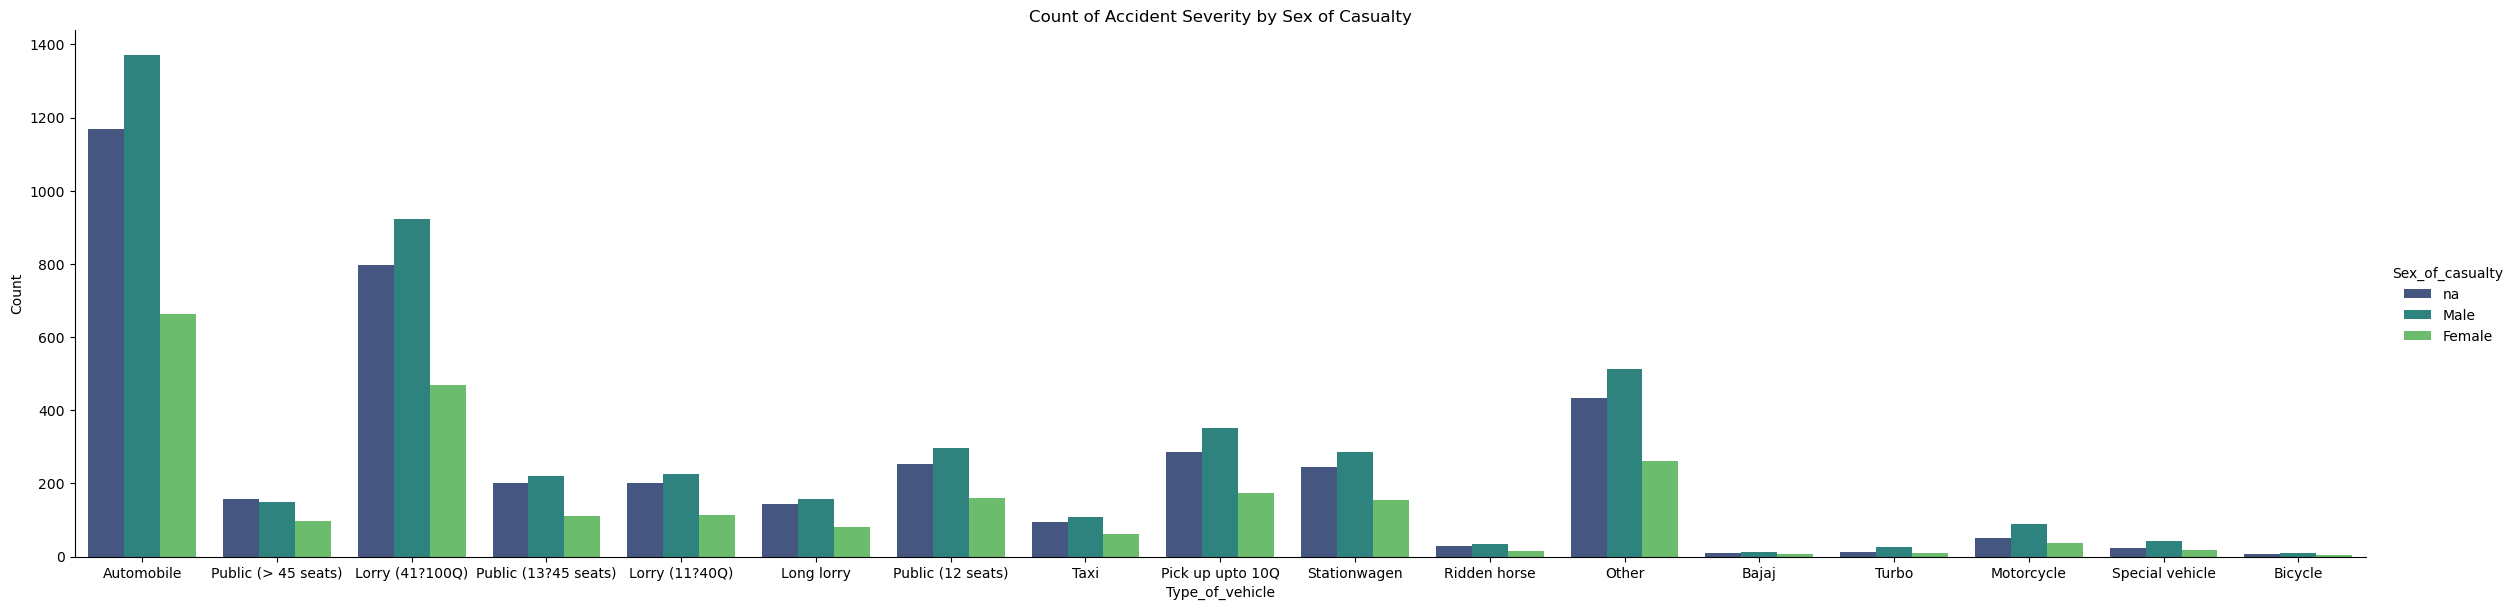

In [14]:
#creating exploratory analysis for showing the feature that creates a major impact
plt.figure(figsize=(10,5))
sns.catplot(data=acc_sev, x='Type_of_vehicle', hue='Sex_of_casualty', kind='count',height=6,aspect=4,palette='viridis')
plt.title('Count of Accident Severity by Sex of Casualty')
plt.xlabel('Type_of_vehicle')
plt.ylabel('Count')
plt.show()

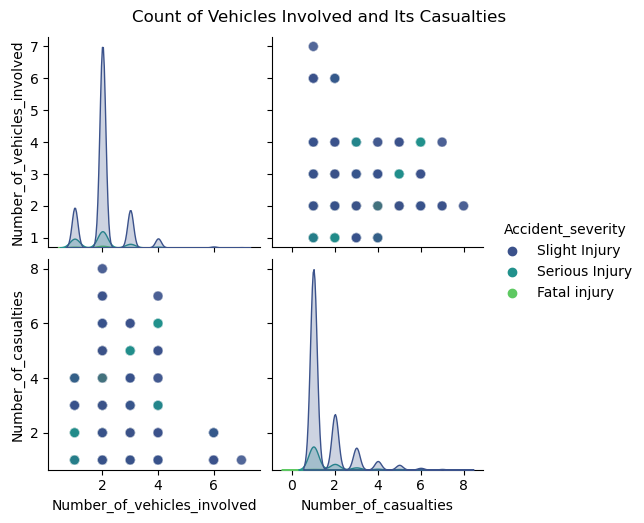

In [15]:
#creating exploratory analysis for showing a realtion between the numerical features
sns.pairplot(data=acc_sev,                  # DataFrame to plot
    hue='Accident_severity',       # Variable to color the plots
    palette='viridis',                # Color palette to use for different levels of the hue variable
    kind='scatter',                # Kind of plot ('scatter' or 'reg')
    diag_kind='auto',              # Kind of plot for the diagonal ('auto', 'hist', 'kde', 'none')
    markers='o',                   # Marker to use for the scatterplot
    height=2.5,                    # Height of each facet (in inches)
    aspect=1,                      # Aspect ratio of each facet
    corner=False,                  # If True, don't add redundant axes (lower left triangle only)
    dropna=True,                   # Drop missing values before plotting
    plot_kws={'s':50, 'alpha':0.25}, # Keyword arguments for underlying plot functions
    diag_kws={},                   # Keyword arguments for underlying diagonal plot functions
    grid_kws={'diag_sharey': False} # Keyword arguments for the grid
)

# Add a super title
plt.suptitle('Count of Vehicles Involved and Its Casualties', y=1.03) # y is the distance between title and image

# Show the plot
plt.show()

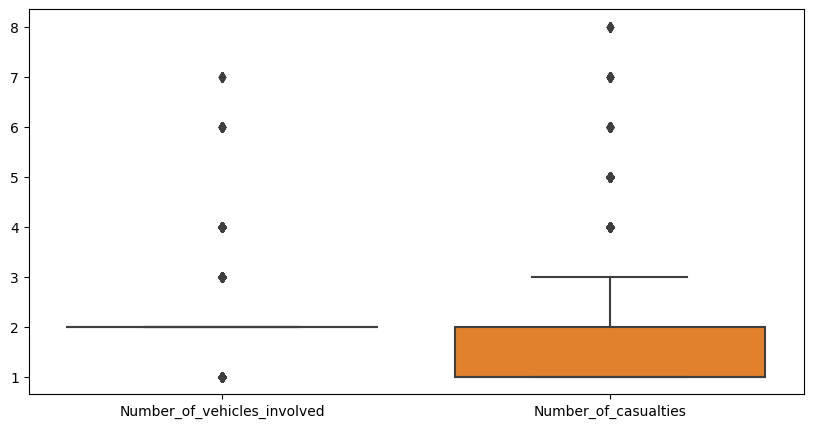

In [16]:
#creating exploratory analysis for outliers and identifying through boxplot
plt.figure(figsize=(10,5))
sns.boxplot(acc_sev)
plt.show()

# Pre Processing

In [17]:
#replacing the missing categorical values with the most frequent categorical values from dataset
acc_sev['Educational_level']=acc_sev['Educational_level'].fillna('Junior high school')
acc_sev['Vehicle_driver_relation']=acc_sev['Vehicle_driver_relation'].fillna('Employee')
acc_sev['Driving_experience']=acc_sev['Driving_experience'].fillna('5-10yr')
acc_sev['Type_of_vehicle']=acc_sev['Type_of_vehicle'].fillna('Automobile')
acc_sev['Owner_of_vehicle']=acc_sev['Owner_of_vehicle'].fillna('Owner')
acc_sev['Service_year_of_vehicle']=acc_sev['Service_year_of_vehicle'].fillna('Unknown')
acc_sev['Defect_of_vehicle']=acc_sev['Defect_of_vehicle'].fillna('No defect')
acc_sev['Area_accident_occured']=acc_sev['Area_accident_occured'].fillna('Other')
acc_sev['Lanes_or_Medians']=acc_sev['Lanes_or_Medians'].fillna('Two-way (divided with broken lines road marking)')
acc_sev['Road_allignment']=acc_sev['Road_allignment'].fillna('Tangent road with flat terrain')
acc_sev['Types_of_Junction']=acc_sev['Types_of_Junction'].fillna('Y Shape')
acc_sev['Road_surface_type']=acc_sev['Road_surface_type'].fillna('Asphalt roads')
acc_sev['Type_of_collision']=acc_sev['Type_of_collision'].fillna('Vehicle with vehicle collision')
acc_sev['Vehicle_movement']=acc_sev['Vehicle_movement'].fillna('Going straight')
acc_sev['Work_of_casuality']=acc_sev['Work_of_casuality'].fillna('Driver')
acc_sev['Fitness_of_casuality']=acc_sev['Fitness_of_casuality'].fillna('Normal')

In [18]:
#remove beginning spaces from the data points in specified column
acc_sev['Area_accident_occured']=acc_sev['Area_accident_occured'].str.lstrip()

In [19]:
#the entire information of the dataset to check the count of null values after pre-processing
acc_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

# Encoding 

In [20]:
#replacing the values that can't be converted by encoder
acc_sev['Driving_experience']=acc_sev['Driving_experience'].replace(['Below 1yr','1-2yr','2-5yr','5-10yr','Above 10yr'], 
                                                                    ['a','b','c','d','e'])
acc_sev['Age_band_of_driver']=acc_sev['Age_band_of_driver'].replace(['Under 18','18-30','31-50','Over 51'],
                                                                    ['a','b','c','d'])
acc_sev['Type_of_vehicle']=acc_sev['Type_of_vehicle'].replace(['Lorry (41?100Q)','Pick up upto 10Q','Public (12 seats)','Lorry (11?40Q)'
                                                             ,'Public (13?45 seats)','Public (> 45 seats)'],
                                                             ['a','b','c','d','e','f'])
acc_sev['Service_year_of_vehicle']=acc_sev['Service_year_of_vehicle'].replace(['Below 1yr','1-2yr','2-5yrs','5-10yrs','Above 10yr'],
                                                                              ['a','b','c','d','e'])
acc_sev['Age_band_of_casualty']=acc_sev['Age_band_of_casualty'].replace(['Under 18','18-30','31-50','Over 51'],
                                                                        ['a','b','c','d'])
acc_sev['Fitness_of_casuality']=acc_sev['Fitness_of_casuality'].replace(['NormalNormal'],['Normal'])

# Label Encoder

In [21]:
#encoding categorical data using label encoder(non-null value columns)
encoder1=LabelEncoder() 
acc_sev['Accident_severity']=encoder1.fit_transform(acc_sev['Accident_severity'])#0 = Fatal Injury, 1= Serious Injury, 2=Slight Injury 
acc_sev['Sex_of_driver']=encoder1.fit_transform(acc_sev['Sex_of_driver'])
acc_sev['Road_surface_conditions']=encoder1.fit_transform(acc_sev['Road_surface_conditions'])
acc_sev['Light_conditions']=encoder1.fit_transform(acc_sev['Light_conditions'])
acc_sev['Casualty_class']=encoder1.fit_transform(acc_sev['Casualty_class'])
acc_sev['Sex_of_casualty']=encoder1.fit_transform(acc_sev['Sex_of_casualty'])
acc_sev['Day_of_week']=encoder1.fit_transform(acc_sev['Day_of_week'])
acc_sev['Pedestrian_movement']=encoder1.fit_transform(acc_sev['Pedestrian_movement'])
acc_sev['Weather_conditions']=encoder1.fit_transform(acc_sev['Weather_conditions'])
acc_sev['Cause_of_accident']=encoder1.fit_transform(acc_sev['Cause_of_accident'])
acc_sev['Age_band_of_driver']=encoder1.fit_transform(acc_sev['Age_band_of_driver'])
acc_sev['Age_band_of_casualty']=encoder1.fit_transform(acc_sev['Age_band_of_casualty'])
acc_sev['Casualty_severity']=encoder1.fit_transform(acc_sev['Casualty_severity'])


#encoding categorical data using label encoder(null value columns)
encoder2=LabelEncoder()
acc_sev['Educational_level']=encoder2.fit_transform(acc_sev['Educational_level'])
acc_sev['Vehicle_driver_relation']=encoder2.fit_transform(acc_sev['Vehicle_driver_relation'])
acc_sev['Owner_of_vehicle']=encoder2.fit_transform(acc_sev['Owner_of_vehicle'])
acc_sev['Defect_of_vehicle']=encoder2.fit_transform(acc_sev['Defect_of_vehicle'])
acc_sev['Fitness_of_casuality']=encoder2.fit_transform(acc_sev['Fitness_of_casuality'])
acc_sev['Work_of_casuality']=encoder2.fit_transform(acc_sev['Work_of_casuality'])
acc_sev['Vehicle_movement']=encoder2.fit_transform(acc_sev['Vehicle_movement'])
acc_sev['Type_of_collision']=encoder2.fit_transform(acc_sev['Type_of_collision'])
acc_sev['Road_surface_type']=encoder2.fit_transform(acc_sev['Road_surface_type'])
acc_sev['Area_accident_occured']=encoder2.fit_transform(acc_sev['Area_accident_occured'])
acc_sev['Lanes_or_Medians']=encoder2.fit_transform(acc_sev['Lanes_or_Medians'])
acc_sev['Types_of_Junction']=encoder2.fit_transform(acc_sev['Types_of_Junction'])
acc_sev['Road_allignment']=encoder2.fit_transform(acc_sev['Road_allignment'])
acc_sev['Type_of_vehicle']=encoder2.fit_transform(acc_sev['Type_of_vehicle'])
acc_sev['Driving_experience']=encoder2.fit_transform(acc_sev['Driving_experience'])
acc_sev['Service_year_of_vehicle']=encoder2.fit_transform(acc_sev['Service_year_of_vehicle'])

#checking the information for datatype changes and column counts
acc_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  int32 
 2   Age_band_of_driver           12316 non-null  int32 
 3   Sex_of_driver                12316 non-null  int32 
 4   Educational_level            12316 non-null  int32 
 5   Vehicle_driver_relation      12316 non-null  int32 
 6   Driving_experience           12316 non-null  int32 
 7   Type_of_vehicle              12316 non-null  int32 
 8   Owner_of_vehicle             12316 non-null  int32 
 9   Service_year_of_vehicle      12316 non-null  int32 
 10  Defect_of_vehicle            12316 non-null  int32 
 11  Area_accident_occured        12316 non-null  int32 
 12  Lanes_or_Medians             12316 non-null  int32 
 13  Road_allignment              12

In [22]:
#gives the described information of data
acc_sev.describe()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.980513,2.270867,0.957535,3.208347,0.333793,3.326486,6.689834,2.693975,1.546931,1.987983,4.938698,2.946736,4.930091,3.635677,0.177899,0.718902,2.177493,2.414907,6.405408,2.040679,1.548149,2.864566,1.453962,1.148019,3.319341,2.293927,0.674082,1.997077,4.836067,6.916044,1.832819
std,2.059712,1.158926,0.263767,1.361538,0.741375,1.287379,5.648358,0.877637,1.886462,0.133116,2.442829,1.716511,0.902867,3.094667,0.696446,1.276059,1.324187,1.146012,2.726791,0.688790,1.007179,2.057282,1.331309,0.742709,1.480446,0.587734,1.221069,0.093602,0.893611,5.101751,0.406082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,4.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,6.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,5.000000,1.000000,2.000000
50%,3.000000,2.000000,1.000000,4.000000,0.000000,4.000000,8.000000,3.000000,0.000000,2.000000,5.000000,2.000000,5.000000,2.000000,0.000000,0.000000,3.000000,2.000000,8.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,0.000000,2.000000,5.000000,9.000000,2.000000
75%,5.000000,3.000000,1.000000,4.000000,0.000000,4.000000,11.000000,3.000000,3.000000,2.000000,6.000000,4.000000,5.000000,7.000000,0.000000,0.000000,3.000000,2.000000,8.000000,2.000000,2.000000,3.000000,3.000000,2.000000,5.000000,3.000000,1.000000,2.000000,5.000000,11.000000,2.000000
max,6.000000,4.000000,2.000000,6.000000,3.000000,6.000000,16.000000,3.000000,5.000000,2.000000,12.000000,6.000000,8.000000,7.000000,4.000000,3.000000,3.000000,8.000000,9.000000,7.000000,8.000000,12.000000,3.000000,2.000000,5.000000,3.000000,6.000000,3.000000,8.000000,19.000000,2.000000


In [23]:
#dropping the Time feature for taking correlation feature
acc_sev=acc_sev.drop(columns=['Time'])

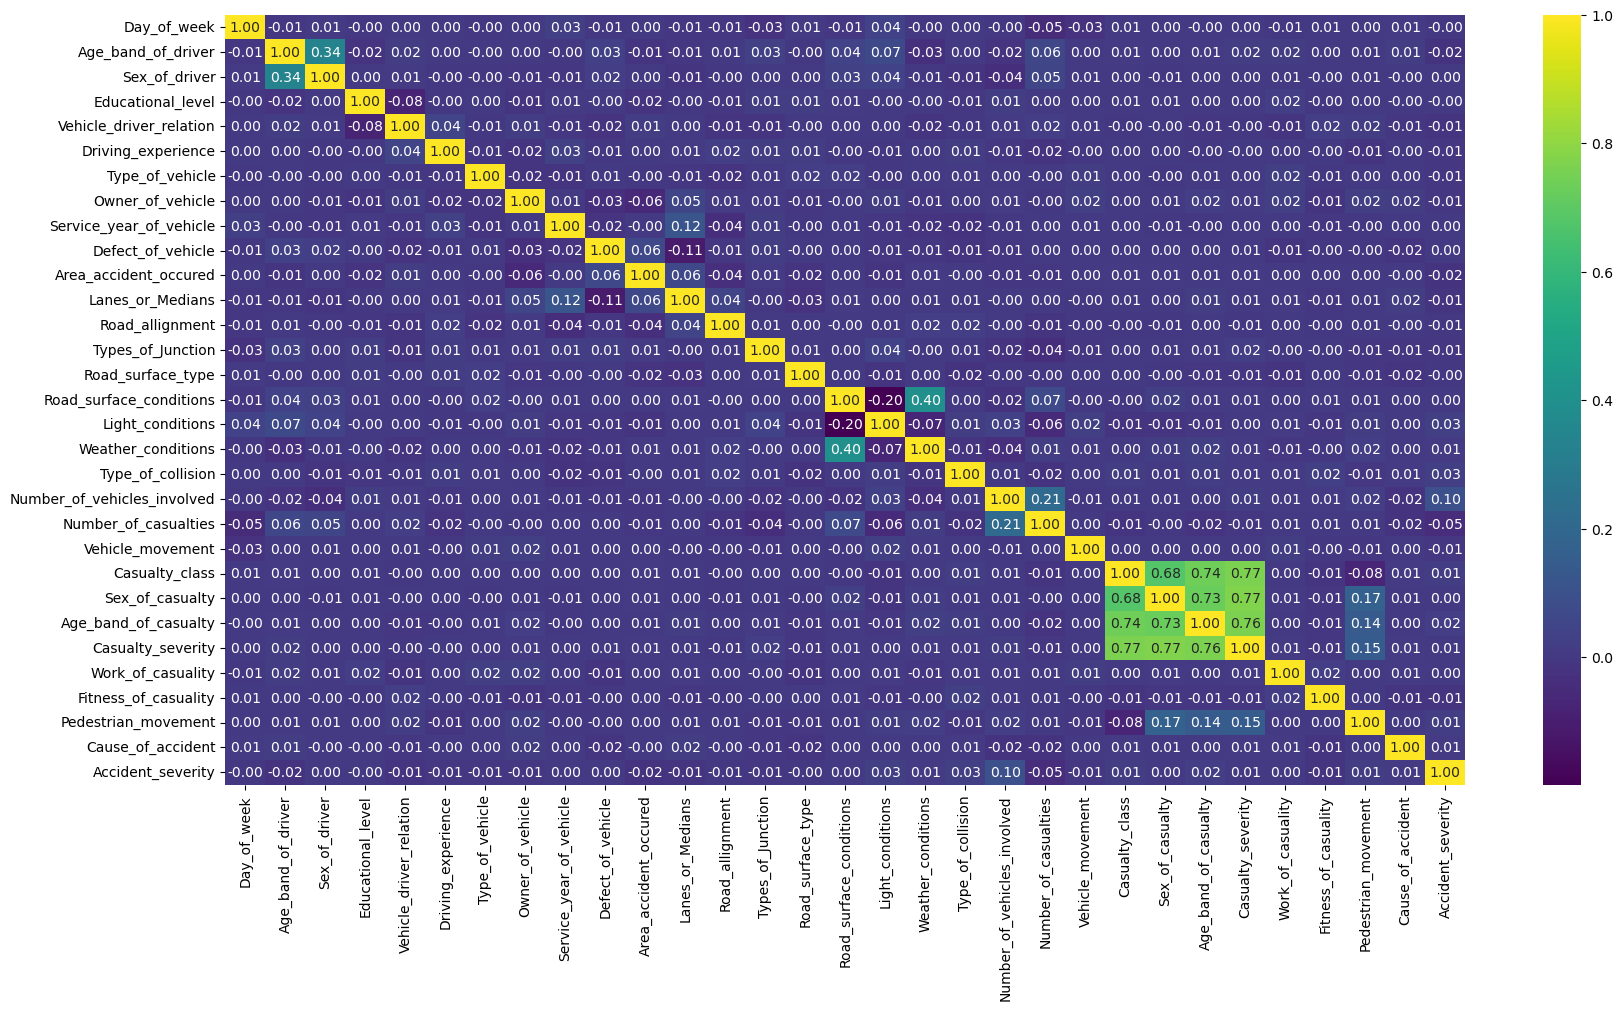

In [24]:
#plotting correlated features in heatmap for better interpretability
correlation=acc_sev.corr()
correlation

plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='viridis')
plt.show()

# Standard Scaler

In [25]:
#seperating columns from dataset for scaling the values without affecting the target
columns_left=['Accident_severity']
acc_sev1=acc_sev.drop(columns=columns_left)
acc_sev2=acc_sev[columns_left]

In [26]:
#used for scaling values between a range for improved accuracy
scaler=StandardScaler()
acc_sev3=scaler.fit_transform(acc_sev1)
acc_sev3=pd.DataFrame(acc_sev3)
acc_sev=pd.concat([acc_sev3,acc_sev2],axis=1)
acc_sev

#renaming the column similar to other columns 
acc_sev = acc_sev.rename(columns={'Accident_severity':30})
acc_sev

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-0.961588,-0.233732,0.161001,-2.356509,-0.450254,-1.030419,-1.184434,0.348706,1.830521,0.090277,1.253230,-0.551569,0.077433,-0.851718,-0.255448,-0.5634,0.621167,-0.362059,-1.248921,-0.059061,0.448649,-0.420264,1.161339,1.147173,1.135285,1.201397,-0.552066,0.03123,0.183458,0.408495,2
1,-0.961588,0.629171,0.161001,0.581464,-0.450254,1.299992,1.648363,0.348706,1.300407,0.090277,-0.384282,0.613632,0.077433,-0.851718,-0.255448,-0.5634,0.621167,-0.362059,0.584811,-0.059061,0.448649,-0.420264,1.161339,1.147173,1.135285,1.201397,-0.552066,0.03123,0.183458,1.780629,2
2,-0.961588,-0.233732,0.161001,0.581464,-0.450254,-1.030419,0.763114,0.348706,-0.820050,0.090277,0.843852,1.778833,0.077433,-0.851718,-0.255448,-0.5634,0.621167,-0.362059,-1.615667,-0.059061,0.448649,-0.420264,-1.092174,-0.199304,-0.215715,-0.500122,-0.552066,0.03123,0.183458,-1.355677,1
3,0.009461,-0.233732,0.161001,0.581464,-0.450254,0.523188,1.648363,-3.069702,-0.820050,0.090277,-0.384282,1.778833,1.185061,1.087180,2.616393,-0.5634,-1.644466,-0.362059,0.584811,-0.059061,0.448649,-0.420264,0.410168,-1.545781,-0.891214,-0.500122,-0.552066,0.03123,0.183458,-1.159658,2
4,0.009461,-0.233732,0.161001,0.581464,-0.450254,-0.253615,-1.184434,0.348706,1.300407,0.090277,-1.203038,1.778833,0.077433,1.087180,-0.255448,-0.5634,-1.644466,-0.362059,0.584811,-0.059061,0.448649,-0.420264,1.161339,1.147173,1.135285,1.201397,-0.552066,0.03123,0.183458,1.780629,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1.466035,0.629171,0.161001,0.581464,-0.450254,-0.253615,1.294263,0.348706,-0.820050,0.090277,0.434474,0.613632,0.077433,-0.851718,-0.255448,-0.5634,0.621167,-0.362059,0.584811,-0.059061,-0.544264,-0.420264,1.161339,1.147173,1.135285,1.201397,-0.552066,0.03123,0.183458,0.604514,2
12312,0.009461,-1.959538,0.161001,-1.622016,-0.450254,0.523188,-1.184434,0.348706,-0.820050,0.090277,0.434474,-0.551569,-5.460705,-0.851718,-0.255448,-0.5634,0.621167,-0.362059,0.584811,-0.059061,-0.544264,0.551932,1.161339,1.147173,1.135285,1.201397,-0.552066,0.03123,0.183458,0.604514,2
12313,0.009461,1.492074,0.161001,0.581464,-0.450254,0.523188,-1.007384,0.348706,0.770293,0.090277,0.434474,-0.551569,2.292688,-0.851718,-0.255448,-0.5634,0.621167,-0.362059,0.584811,-1.510942,-0.544264,0.551932,-1.092174,-0.199304,-0.215715,-0.500122,-0.552066,0.03123,0.183458,-1.159658,1
12314,0.009461,-0.233732,-3.630380,0.581464,-0.450254,1.299992,0.763114,0.348706,0.770293,0.090277,-0.384282,0.613632,2.292688,-0.851718,-0.255448,-0.5634,-1.644466,-0.362059,0.584811,-0.059061,-0.544264,0.551932,1.161339,1.147173,1.135285,1.201397,-0.552066,0.03123,0.183458,-0.375581,2


# Splitting the data

In [27]:
#spliting the features and target from the dataset
x=acc_sev.iloc[:,0:30]
y=acc_sev.iloc[:,-1] 
y=y.astype(int)
sm = SMOTE(random_state=42)
x_smote,y_smote = sm.fit_resample(x,y)

# ML Models Implementation

### K  Nearest Neighbors Classifiers (KNN Model)

In [28]:
#using train_test_split method to give model training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3)
x_train1 = np.ascontiguousarray(x_train)
x_test1 = np.ascontiguousarray(x_test)
y_train1 = np.ascontiguousarray(y_train)
y_test1 = np.ascontiguousarray(y_test)

In [29]:
#tuning and training the model with GRID SEARCH to get best parameters
KNN=KNeighborsClassifier()
param_grid = {'n_neighbors': [5, 7, 9],
              'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train1,y_train1)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5}


In [30]:
#testing the model once after completing training
KNN=KNeighborsClassifier(n_neighbors=5,metric='manhattan')
KNN=grid_search.fit(x_train1, y_train1)
y_pred1 = KNN.predict(x_test1)
KNN 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 7, 9]},
             scoring='accuracy')

In [31]:
#evaluation metrics for model's performance
KNN_Accuracy=accuracy_score(y_test1,y_pred1)

print('Accuracy of KNN Classifier: {:.2f}%'.format(KNN_Accuracy * 100))

#report for classfication to evaluate performance
Report1=classification_report(y_test1,y_pred1)

print('Classification Report of KNN:','\n',Report1)

Accuracy of KNN Classifier: 87.63%
Classification Report of KNN: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3065
           1       0.77      0.97      0.86      3106
           2       0.97      0.66      0.79      3203

    accuracy                           0.88      9374
   macro avg       0.89      0.88      0.87      9374
weighted avg       0.89      0.88      0.87      9374



### Random Forest Classifiers

In [32]:
#using train_test_split method to give model training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3)
x_train2 = np.ascontiguousarray(x_train)
x_test2 = np.ascontiguousarray(x_test)
y_train2 = np.ascontiguousarray(y_train)
y_test2 = np.ascontiguousarray(y_test)

In [33]:
#grid search for Random Forest Classifier to get best parameters
param_grid1 ={'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']}

#setting up GridSearchCV for hyperparameter tuning
grid_search1 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=6),
    param_grid=param_grid1,
    cv=3,
    n_jobs=-1,
    verbose=10,  
    scoring='accuracy')

#shows the backend runtime process of gridsearch
from joblib import parallel_backend
with parallel_backend('threading'):
    grid_search1.fit(x_train2,y_train2)

print(f"Best parameters found: {grid_search1.best_params_}")
print(f"Best accuracy: {grid_search1.best_score_}")

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV 1/3; 1/648] START bootstrap=True, class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 1/648] START bootstrap=True, class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 1/648] START bootstrap=True, class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/648] START bootstrap=True, class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 2/648] START bootstrap=True, class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 2/648] START bootstrap=True, class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 3/648] START bootstrap=True, class_weig

In [34]:
#training the model from the obtained best parameters
params1 = {
    'bootstrap': False,
    'class_weight': None,
    'max_depth': 20,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

rfc= RandomForestClassifier(**params1)
rfc_model= rfc.fit(x_train2,y_train2)
rfc_model

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=300)

In [35]:
#testing the model once after completing training
y_pred2=rfc_model.predict(x_test2)

In [36]:
#evaluation metrics for model's performance
RFC_accuracy=accuracy_score(y_test2,y_pred2)

print('Accuracy of Random Forest Classifier: {:.2f}%'.format(RFC_accuracy * 100))

#report for classfication to evaluate performance
Report2=classification_report(y_test2,y_pred2)

print('Classification Report of Random Forest:','\n',Report2)

Accuracy of Random Forest Classifier: 94.78%
Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3100
           1       0.99      0.86      0.92      3107
           2       0.88      0.99      0.93      3167

    accuracy                           0.95      9374
   macro avg       0.95      0.95      0.95      9374
weighted avg       0.95      0.95      0.95      9374



### Gradient Boosting Classifier

In [37]:
#using train_test_split method to give model training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3)
x_train3 = np.ascontiguousarray(x_train)
x_test3 = np.ascontiguousarray(x_test)
y_train3 = np.ascontiguousarray(y_train)
y_test3 = np.ascontiguousarray(y_test)

In [38]:
#grid search for Gradient Boosting Classifier to get best parameters
param_grid2 = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

#setting up GridSearchCV for hyperparameter tuning
grid_search2 = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid2,
    cv=2,
    n_jobs=-1,
    verbose=10,  # Verbosity level for showing progress
    scoring='accuracy')

#shows the backend runtime process of gridsearch
from joblib import parallel_backend
with parallel_backend('threading'):
       grid_search2.fit(x_train3,y_train3)
        
print(f"Best parameters found: {grid_search2.best_params_}")
print(f"Best accuracy: {grid_search2.best_score_}")

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV 1/2; 1/81] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50
[CV 2/2; 1/81] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50
[CV 1/2; 2/81] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100
[CV 2/2; 2/81] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100
[CV 1/2; 3/81] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=150
[CV 2/2; 3/81] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=150
[CV 1/2; 4/81] START learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50
[CV 2/2; 4/81] START learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50
[CV 1/2; 5/81] START learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100
[CV 2/2; 5/81] START learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100
[CV 1/2; 6/81] START l

In [39]:
#training the model from the obtained best parameters
params1={'learning_rate': 0.2, 
         'max_depth': 7, 
         'min_samples_split': 2, 
         'n_estimators': 150}

gbc = GradientBoostingClassifier(**params1)
gbc_model=gbc.fit(x_train3,y_train3)
gbc_model

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=150)

In [40]:
#testing the model once after completing training
y_pred3 = gbc_model.predict(x_test3)

In [41]:
#evaluation metrics for model's performance
GBC_accuracy = accuracy_score(y_test3, y_pred3)

print('Accuracy of Gradient Boosting Classifier : {:.2f}%'.format(GBC_accuracy * 100))

#report for classfication to evaluate performance
Report3=classification_report(y_test3, y_pred3)

print('Classification Report of Gradient Boosting:','\n',Report3)

Accuracy of Gradient Boosting Classifier : 93.83%
Classification Report of Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3124
           1       0.97      0.85      0.91      3125
           2       0.86      0.98      0.92      3125

    accuracy                           0.94      9374
   macro avg       0.94      0.94      0.94      9374
weighted avg       0.94      0.94      0.94      9374



# Comparison of models

In [42]:
#comparing the highest accuracy score to select the best model 
final_report = pd.DataFrame({'S.NO':[1,2,3],'Models':["KNN Classifier","Random Forest Classifier","Gradient Boosting Classifier"],
                         "Accuracy Score":[KNN_Accuracy * 100,RFC_accuracy * 100,GBC_accuracy * 100]})                       

print(final_report)

#to get the best performing model from all models
best_model_index = final_report['Accuracy Score'].idxmax()

best_model = final_report.loc[best_model_index, 'Models']

#print the best performing model
print(f'The best performing model is: {best_model}')

   S.NO                        Models  Accuracy Score
0     1                KNN Classifier       87.625347
1     2      Random Forest Classifier       94.783444
2     3  Gradient Boosting Classifier       93.834009
The best performing model is: Random Forest Classifier
